## Implementation Of SGD On Boston Dataset

In [1]:
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
boston=load_boston()

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
X = load_boston().data
Y = load_boston().target

In [5]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [6]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## CREATING A DATAFRAME :

In [8]:
boston_load=pd.DataFrame(X,columns=boston.feature_names)

In [9]:
y=pd.DataFrame(Y,columns=['Output'])

In [10]:
boston_data=pd.concat([boston_load,y], axis=1, sort=False)

In [11]:
print(boston_data.shape)

(506, 14)


In [12]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Output
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
boston_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Output
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Analysis Of Various Features 

### CRIM 

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


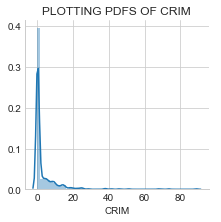

In [14]:
sns.set_style("whitegrid")
sns.FacetGrid(boston_data).map(sns.distplot,"CRIM").add_legend();
plt.title('PLOTTING PDFS OF CRIM')
plt.show();

We observe that the distribution is almost like a Power Law Distribution. So we need to apply boxcox transform to convert it into gaussian distribution

[0.81818182 0.09288538 0.04347826 0.01976285 0.00988142 0.
 0.00395257 0.00395257 0.00197628 0.         0.         0.00197628
 0.00197628 0.         0.00197628]
[6.32000000e-03 5.93764533e+00 1.18689707e+01 1.78002960e+01
 2.37316213e+01 2.96629467e+01 3.55942720e+01 4.15255973e+01
 4.74569227e+01 5.33882480e+01 5.93195733e+01 6.52508987e+01
 7.11822240e+01 7.71135493e+01 8.30448747e+01 8.89762000e+01]


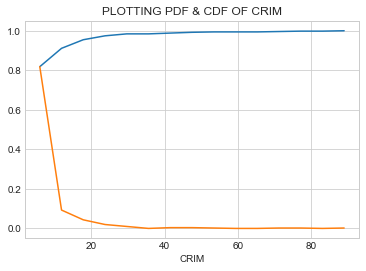

In [15]:
counts,binedges=np.histogram(boston_data['CRIM'],bins=15,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(binedges)
cdf=np.cumsum(pdf)
plt.plot(binedges[1:],cdf)
plt.plot(binedges[1:],pdf)
plt.title('PLOTTING PDF & CDF OF CRIM')
plt.xlabel('CRIM')
plt.show();

Text(0.5,1,'Probplot after Box-Cox transformation')

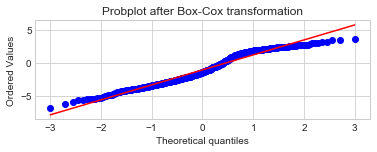

In [16]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
crim,_ = stats.boxcox(boston_data["CRIM"])
prob = stats.probplot(crim, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

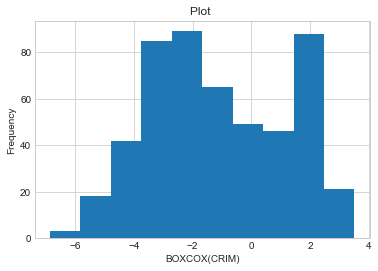

In [17]:
plt.hist(crim)
plt.title("Plot ")
plt.xlabel("BOXCOX(CRIM)")
plt.ylabel("Frequency")
plt.show()

### ZN :

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


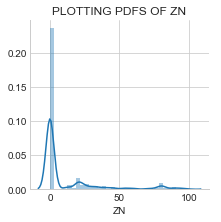

In [18]:
sns.set_style("whitegrid")
sns.FacetGrid(boston_data).map(sns.distplot,"ZN").add_legend();
plt.title('PLOTTING PDFS OF ZN')
plt.show();

[0.73517787 0.01976285 0.00395257 0.08893281 0.0256917  0.01185771
 0.0256917  0.00592885 0.00592885 0.00790514 0.00592885 0.00592885
 0.03754941 0.00988142 0.00988142]
[  0.           6.66666667  13.33333333  20.          26.66666667
  33.33333333  40.          46.66666667  53.33333333  60.
  66.66666667  73.33333333  80.          86.66666667  93.33333333
 100.        ]


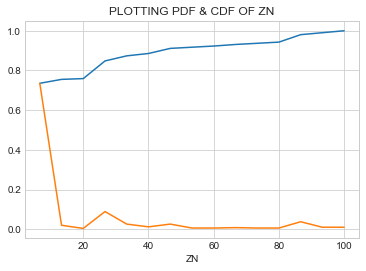

In [19]:
counts,binedges=np.histogram(boston_data['ZN'],bins=15,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(binedges)
cdf=np.cumsum(pdf)
plt.plot(binedges[1:],cdf)
plt.plot(binedges[1:],pdf)
plt.title('PLOTTING PDF & CDF OF ZN')
plt.xlabel('ZN')
plt.show();

Here Data Is negative so box-cox transformation is having error here. So not getting any proper distribution

### INDUS 

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


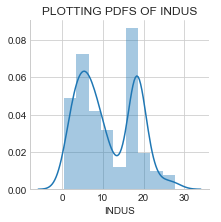

In [20]:
sns.set_style("whitegrid")
sns.FacetGrid(boston_data).map(sns.distplot,"INDUS").add_legend();
plt.title('PLOTTING PDFS OF INDUS')
plt.show();

[0.06916996 0.1284585  0.10079051 0.11660079 0.07905138 0.08695652
 0.02173913 0.01778656 0.00592885 0.26086957 0.05928854 0.02964427
 0.         0.01383399 0.00988142]
[ 0.46        2.27866667  4.09733333  5.916       7.73466667  9.55333333
 11.372      13.19066667 15.00933333 16.828      18.64666667 20.46533333
 22.284      24.10266667 25.92133333 27.74      ]


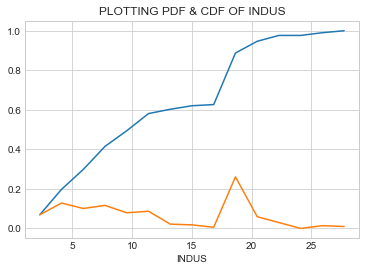

In [21]:
counts,binedges=np.histogram(boston_data['INDUS'],bins=15,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(binedges)
cdf=np.cumsum(pdf)
plt.plot(binedges[1:],cdf)
plt.plot(binedges[1:],pdf)
plt.title('PLOTTING PDF & CDF OF INDUS')
plt.xlabel('INDUS')
plt.show();

Text(0.5,1,'Probplot after Box-Cox transformation')

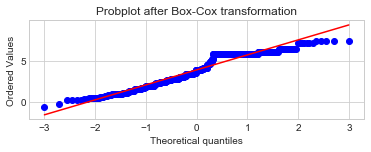

In [22]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
indus,_ = stats.boxcox(boston_data["INDUS"])
prob = stats.probplot(indus, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

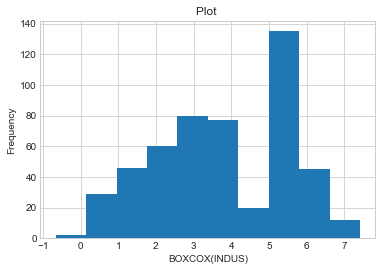

In [23]:
plt.hist(indus)
plt.title("Plot ")
plt.xlabel("BOXCOX(INDUS)")
plt.ylabel("Frequency")
plt.show()

### CHAS

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


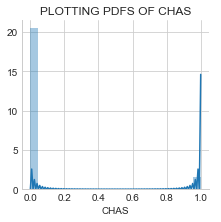

In [24]:
sns.set_style("whitegrid")
sns.FacetGrid(boston_data).map(sns.distplot,"CHAS").add_legend();
plt.title('PLOTTING PDFS OF CHAS')
plt.show();

[0.93083004 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.06916996]
[0.         0.06666667 0.13333333 0.2        0.26666667 0.33333333
 0.4        0.46666667 0.53333333 0.6        0.66666667 0.73333333
 0.8        0.86666667 0.93333333 1.        ]


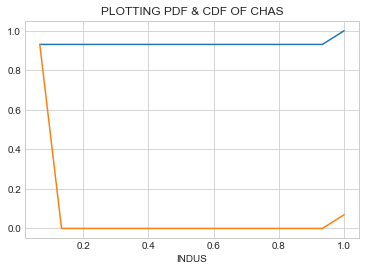

In [25]:
counts,binedges=np.histogram(boston_data['CHAS'],bins=15,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(binedges)
cdf=np.cumsum(pdf)
plt.plot(binedges[1:],cdf)
plt.plot(binedges[1:],pdf)
plt.title('PLOTTING PDF & CDF OF CHAS')
plt.xlabel('INDUS')
plt.show();

CHAS is a binary categorical feature which has very less 1.0 class features.

### NOX 

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


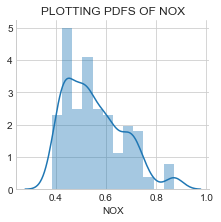

In [26]:
sns.set_style("whitegrid")
sns.FacetGrid(boston_data).map(sns.distplot,"NOX").add_legend();
plt.title('PLOTTING PDFS OF NOX')
plt.show();

[0.09090909 0.16403162 0.0513834  0.12252964 0.13241107 0.03952569
 0.11067194 0.05335968 0.04940711 0.06521739 0.07312253 0.01581028
 0.         0.         0.03162055]
[0.385  0.4174 0.4498 0.4822 0.5146 0.547  0.5794 0.6118 0.6442 0.6766
 0.709  0.7414 0.7738 0.8062 0.8386 0.871 ]


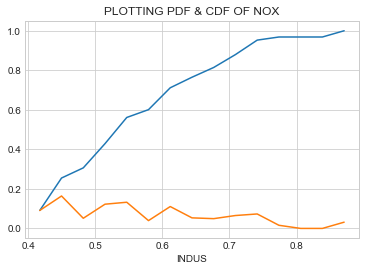

In [27]:
counts,binedges=np.histogram(boston_data['NOX'],bins=15,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(binedges)
cdf=np.cumsum(pdf)
plt.plot(binedges[1:],cdf)
plt.plot(binedges[1:],pdf)
plt.title('PLOTTING PDF & CDF OF NOX')
plt.xlabel('INDUS')
plt.show();

Text(0.5,1,'Probplot after Box-Cox transformation')

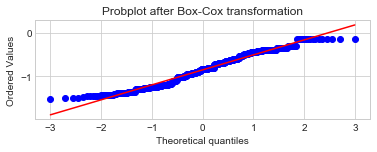

In [28]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
nox,_ = stats.boxcox(boston_data["NOX"])
prob = stats.probplot(nox, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

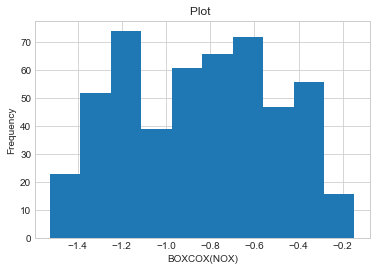

In [29]:
plt.hist(nox)
plt.title("Plot ")
plt.xlabel("BOXCOX(NOX)")
plt.ylabel("Frequency")
plt.show()

### RM 

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


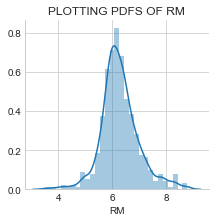

In [30]:
sns.set_style("whitegrid")
sns.FacetGrid(boston_data).map(sns.distplot,"RM").add_legend();
plt.title('PLOTTING PDFS OF RM')
plt.show();

[0.00395257 0.00395257 0.00395257 0.01185771 0.02371542 0.08102767
 0.21146245 0.24703557 0.18972332 0.10474308 0.0513834  0.02371542
 0.02371542 0.01383399 0.00592885]
[3.561      3.90893333 4.25686667 4.6048     4.95273333 5.30066667
 5.6486     5.99653333 6.34446667 6.6924     7.04033333 7.38826667
 7.7362     8.08413333 8.43206667 8.78      ]


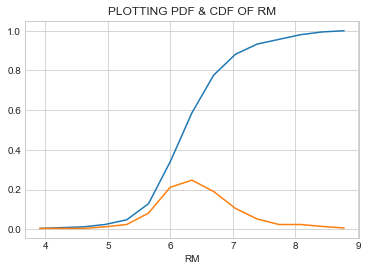

In [31]:
counts,binedges=np.histogram(boston_data['RM'],bins=15,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(binedges)
cdf=np.cumsum(pdf)
plt.plot(binedges[1:],cdf)
plt.plot(binedges[1:],pdf)
plt.title('PLOTTING PDF & CDF OF RM')
plt.xlabel('RM')
plt.show();

THIS DISTRIBUTION SEEMS TO BE ALMOST GAUSSIAN DISTRIBUTION 

### AGE 

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


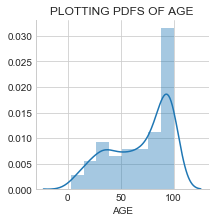

In [32]:
sns.set_style("whitegrid")
sns.FacetGrid(boston_data).map(sns.distplot,"AGE").add_legend();
plt.title('PLOTTING PDFS OF AGE')
plt.show();

[0.02173913 0.01778656 0.04940711 0.02371542 0.06719368 0.04940711
 0.04940711 0.04940711 0.03952569 0.04743083 0.05533597 0.05731225
 0.08300395 0.12450593 0.26482213]
[  2.9          9.37333333  15.84666667  22.32        28.79333333
  35.26666667  41.74        48.21333333  54.68666667  61.16
  67.63333333  74.10666667  80.58        87.05333333  93.52666667
 100.        ]


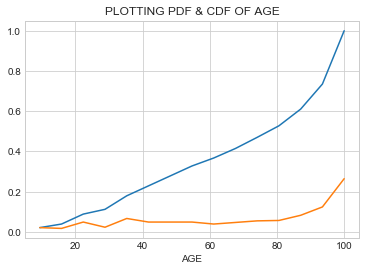

In [33]:
counts,binedges=np.histogram(boston_data['AGE'],bins=15,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(binedges)
cdf=np.cumsum(pdf)
plt.plot(binedges[1:],cdf)
plt.plot(binedges[1:],pdf)
plt.title('PLOTTING PDF & CDF OF AGE')
plt.xlabel('AGE')
plt.show();

Text(0.5,1,'Probplot after Box-Cox transformation')

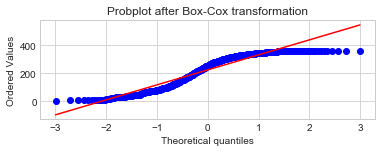

In [34]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
age,_ = stats.boxcox(boston_data["AGE"])
prob = stats.probplot(age, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

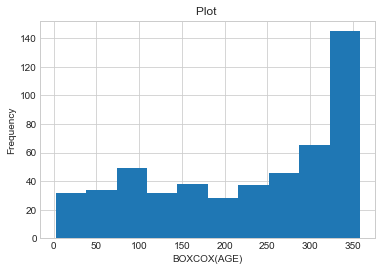

In [35]:
plt.hist(age)
plt.title("Plot ")
plt.xlabel("BOXCOX(AGE)")
plt.ylabel("Frequency")
plt.show()

### DIS 

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


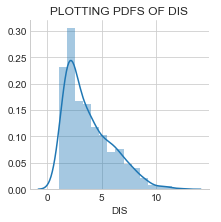

In [36]:
sns.set_style("whitegrid")
sns.FacetGrid(boston_data).map(sns.distplot,"DIS").add_legend();
plt.title('PLOTTING PDFS OF DIS')
plt.show();

[0.16996047 0.22332016 0.12252964 0.11857708 0.08695652 0.07509881
 0.0513834  0.05533597 0.03557312 0.02964427 0.01581028 0.00592885
 0.00395257 0.00395257 0.00197628]
[ 1.1296      1.86272667  2.59585333  3.32898     4.06210667  4.79523333
  5.52836     6.26148667  6.99461333  7.72774     8.46086667  9.19399333
  9.92712    10.66024667 11.39337333 12.1265    ]


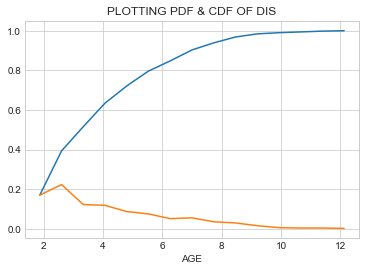

In [37]:
counts,binedges=np.histogram(boston_data['DIS'],bins=15,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(binedges)
cdf=np.cumsum(pdf)
plt.plot(binedges[1:],cdf)
plt.plot(binedges[1:],pdf)
plt.title('PLOTTING PDF & CDF OF DIS')
plt.xlabel('AGE')
plt.show();

Text(0.5,1,'Probplot after Box-Cox transformation')

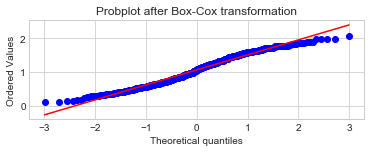

In [38]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
dis,_ = stats.boxcox(boston_data["DIS"])
prob = stats.probplot(dis, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

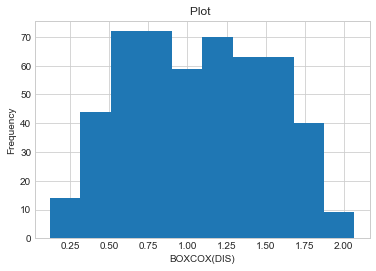

In [39]:
plt.hist(dis)
plt.title("Plot ")
plt.xlabel("BOXCOX(DIS)")
plt.ylabel("Frequency")
plt.show()

WE APPLY BOX COX TRANSFORM HERE AND SEE ALMOST GETTING LIKE A GAUSSIAN PATTERN

### RAD

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


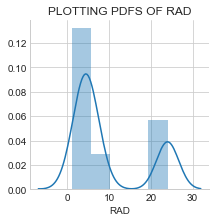

In [40]:
sns.set_style("whitegrid")
sns.FacetGrid(boston_data).map(sns.distplot,"RAD").add_legend();
plt.title('PLOTTING PDFS OF RAD')
plt.show();

[0.08695652 0.29249012 0.22727273 0.08498024 0.04743083 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.26086957]
[ 1.          2.53333333  4.06666667  5.6         7.13333333  8.66666667
 10.2        11.73333333 13.26666667 14.8        16.33333333 17.86666667
 19.4        20.93333333 22.46666667 24.        ]


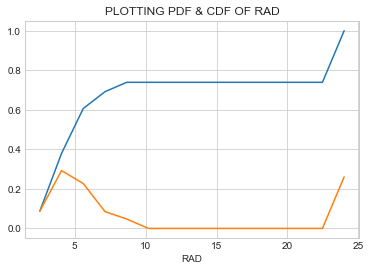

In [41]:
counts,binedges=np.histogram(boston_data['RAD'],bins=15,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(binedges)
cdf=np.cumsum(pdf)
plt.plot(binedges[1:],cdf)
plt.plot(binedges[1:],pdf)
plt.title('PLOTTING PDF & CDF OF RAD')
plt.xlabel('RAD')
plt.show();

Text(0.5,1,'Probplot after Box-Cox transformation')

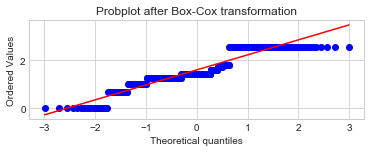

In [42]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
rad,_ = stats.boxcox(boston_data["RAD"])
prob = stats.probplot(rad, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

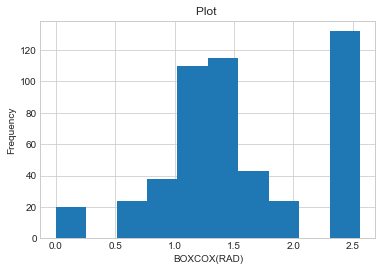

In [43]:
plt.hist(rad)
plt.title("Plot ")
plt.xlabel("BOXCOX(RAD)")
plt.ylabel("Frequency")
plt.show()

NOT SO USEFUL IN APPLYING BOX-COX TRANSFORM

### TAX 

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


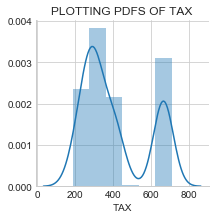

In [44]:
sns.set_style("whitegrid")
sns.FacetGrid(boston_data).map(sns.distplot,"TAX").add_legend();
plt.title('PLOTTING PDFS OF TAX')
plt.show();

[0.04347826 0.11067194 0.15019763 0.16996047 0.06521739 0.04150198
 0.09881423 0.04743083 0.00197628 0.         0.         0.
 0.         0.26086957 0.00988142]
[187.         221.93333333 256.86666667 291.8        326.73333333
 361.66666667 396.6        431.53333333 466.46666667 501.4
 536.33333333 571.26666667 606.2        641.13333333 676.06666667
 711.        ]


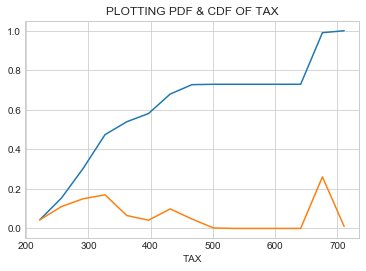

In [45]:
counts,binedges=np.histogram(boston_data['TAX'],bins=15,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(binedges)
cdf=np.cumsum(pdf)
plt.plot(binedges[1:],cdf)
plt.plot(binedges[1:],pdf)
plt.title('PLOTTING PDF & CDF OF TAX')
plt.xlabel('TAX')
plt.show();

Text(0.5,1,'Probplot after Box-Cox transformation')

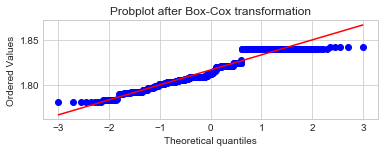

In [46]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
tax,_ = stats.boxcox(boston_data["TAX"])
prob = stats.probplot(tax, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

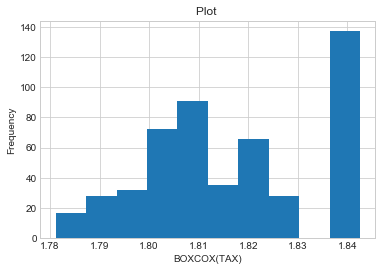

In [47]:
plt.hist(tax)
plt.title("Plot ")
plt.xlabel("BOXCOX(TAX)")
plt.ylabel("Frequency")
plt.show()

NOT SO USEFUL IN APPLYING BOX COX TRANSFORM

### PTRATIO

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


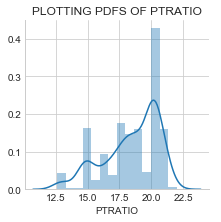

In [48]:
sns.set_style("whitegrid")
sns.FacetGrid(boston_data).map(sns.distplot,"PTRATIO").add_legend();
plt.title('PLOTTING PDFS OF PTRATIO')
plt.show();

[0.02964427 0.00197628 0.00197628 0.08300395 0.03754941 0.02371542
 0.06126482 0.05928854 0.08498024 0.1027668  0.08498024 0.04150198
 0.27667984 0.10671937 0.00395257]
[12.6        13.22666667 13.85333333 14.48       15.10666667 15.73333333
 16.36       16.98666667 17.61333333 18.24       18.86666667 19.49333333
 20.12       20.74666667 21.37333333 22.        ]


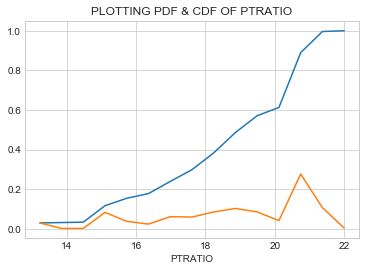

In [49]:
counts,binedges=np.histogram(boston_data['PTRATIO'],bins=15,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(binedges)
cdf=np.cumsum(pdf)
plt.plot(binedges[1:],cdf)
plt.plot(binedges[1:],pdf)
plt.title('PLOTTING PDF & CDF OF PTRATIO')
plt.xlabel('PTRATIO')
plt.show();

Text(0.5,1,'Probplot after Box-Cox transformation')

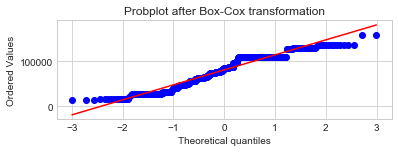

In [50]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
ptratio,_ = stats.boxcox(boston_data["PTRATIO"])
prob = stats.probplot(ptratio, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

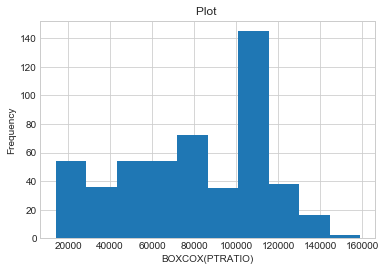

In [51]:
plt.hist(ptratio)
plt.title("Plot ")
plt.xlabel("BOXCOX(PTRATIO)")
plt.ylabel("Frequency")
plt.show()

NOT MUCH USEFUL WE CAN CLEARLY SEE RIGHT SKEWED DISTRIBUTION

### B

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


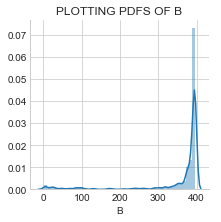

In [52]:
sns.set_style("whitegrid")
sns.FacetGrid(boston_data).map(sns.distplot,"B").add_legend();
plt.title('PLOTTING PDFS OF B')
plt.show();

[0.02766798 0.01383399 0.00592885 0.01778656 0.00592885 0.
 0.00592885 0.00197628 0.00395257 0.01185771 0.00592885 0.01778656
 0.03162055 0.06719368 0.7826087 ]
[3.20000000e-01 2.67586667e+01 5.31973333e+01 7.96360000e+01
 1.06074667e+02 1.32513333e+02 1.58952000e+02 1.85390667e+02
 2.11829333e+02 2.38268000e+02 2.64706667e+02 2.91145333e+02
 3.17584000e+02 3.44022667e+02 3.70461333e+02 3.96900000e+02]


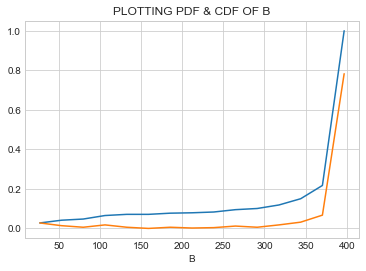

In [53]:
counts,binedges=np.histogram(boston_data['B'],bins=15,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(binedges)
cdf=np.cumsum(pdf)
plt.plot(binedges[1:],cdf)
plt.plot(binedges[1:],pdf)
plt.title('PLOTTING PDF & CDF OF B')
plt.xlabel('B')
plt.show();

Text(0.5,1,'Probplot after Box-Cox transformation')

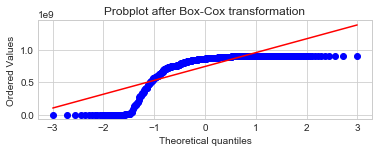

In [54]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
b,_ = stats.boxcox(boston_data["B"])
prob = stats.probplot(b, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

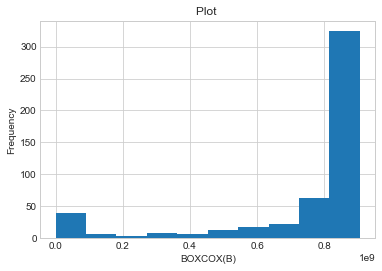

In [55]:
plt.hist(b)
plt.title("Plot ")
plt.xlabel("BOXCOX(B)")
plt.ylabel("Frequency")
plt.show()

RIGHT SKEWED DISTRIBUTION. SO NOT MUCH USEFUL PERFORMING BOX COX TRANSFORM 

### LSTAT

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


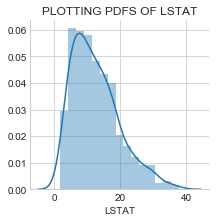

In [56]:
sns.set_style("whitegrid")
sns.FacetGrid(boston_data).map(sns.distplot,"LSTAT").add_legend();
plt.title('PLOTTING PDFS OF LSTAT')
plt.show();

[0.07114625 0.14624506 0.14426877 0.14031621 0.11660079 0.10474308
 0.09683794 0.04940711 0.03952569 0.02964427 0.02173913 0.02173913
 0.00592885 0.00790514 0.00395257]
[ 1.73   4.146  6.562  8.978 11.394 13.81  16.226 18.642 21.058 23.474
 25.89  28.306 30.722 33.138 35.554 37.97 ]


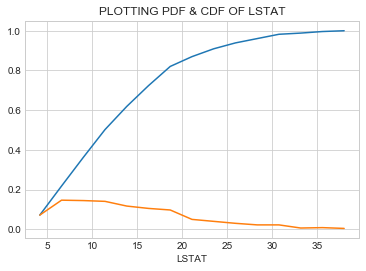

In [57]:
counts,binedges=np.histogram(boston_data['LSTAT'],bins=15,density=True)
pdf=counts/(sum(counts))
print(pdf);
print(binedges)
cdf=np.cumsum(pdf)
plt.plot(binedges[1:],cdf)
plt.plot(binedges[1:],pdf)
plt.title('PLOTTING PDF & CDF OF LSTAT')
plt.xlabel('LSTAT')
plt.show();

Text(0.5,1,'Probplot after Box-Cox transformation')

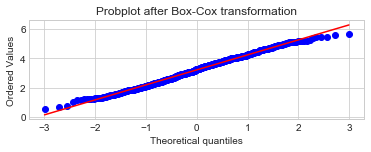

In [58]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
lstat,_ = stats.boxcox(boston_data["LSTAT"])
prob = stats.probplot(lstat, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

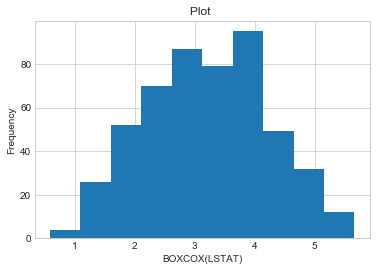

In [59]:
plt.hist(lstat)
plt.title("Plot ")
plt.xlabel("BOXCOX(LSTAT)")
plt.ylabel("Frequency")
plt.show()

THE DISTRIBUTION ALMOST SEEMS LIKE A GAUSSIAN DISTRIBUTION 

### TRANSFORMING THE REQUIRED FEATURES : LSTAT,DIS,CRIM :

In [60]:
boston_data['CRIM']=crim

In [61]:
boston_data['DIS']=dis

In [62]:
boston_data['LSTAT']=lstat

In [63]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Output
0,-6.857264,18.0,2.31,0.0,0.538,6.575,65.2,1.264870,1.0,296.0,15.3,396.90,1.938257,24.0
1,-4.453811,0.0,7.07,0.0,0.469,6.421,78.9,1.418585,2.0,242.0,17.8,396.90,2.876983,21.6
2,-4.454917,0.0,7.07,0.0,0.469,7.185,61.1,1.418585,2.0,242.0,17.8,392.83,1.640387,34.7
3,-4.199825,0.0,2.18,0.0,0.458,6.998,45.8,1.571460,3.0,222.0,18.7,394.63,1.222396,33.4
4,-3.125902,0.0,2.18,0.0,0.458,7.147,54.2,1.571460,3.0,222.0,18.7,396.90,2.036925,36.2


### STANDARD SCALING OF THE FEATURES :

In [64]:
X=boston_data.drop("Output",axis =1)
Y=boston_data["Output"]

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.21,random_state=100)
X_train,X_cv,Y_train,Y_cv = train_test_split(X_train,Y_train,test_size=0.25,random_state=100) 
print('Train - Predictors shape', X_train.shape)
print('CV - Predictors shape', X_cv.shape)
print('Test - Predictors shape', X_test.shape)
print('Train - Target shape', Y_train.shape)
print('CV - Target shape', Y_cv.shape)
print('Test - Target shape', Y_test.shape)

Train - Predictors shape (299, 13)
CV - Predictors shape (100, 13)
Test - Predictors shape (107, 13)
Train - Target shape (299,)
CV - Target shape (100,)
Test - Target shape (107,)


In [66]:
from sklearn.preprocessing import StandardScaler
crim = StandardScaler()
crim.fit(X_train['CRIM'].values.reshape(-1,1))
crim_train = crim.transform(X_train['CRIM'].values.reshape(-1,1))
crim_cv = crim.transform(X_cv['CRIM'].values.reshape(-1,1))
crim_test = crim.transform(X_test['CRIM'].values.reshape(-1,1))
print(crim_train.shape, Y_train.shape)
print(crim_cv.shape, Y_cv.shape)
print(crim_test.shape, Y_test.shape)

zn = StandardScaler()
zn.fit(X_train['ZN'].values.reshape(-1,1))
zn_train = zn.transform(X_train['ZN'].values.reshape(-1,1))
zn_cv = zn.transform(X_cv['ZN'].values.reshape(-1,1))
zn_test = zn.transform(X_test['ZN'].values.reshape(-1,1))
print(zn_train.shape, Y_train.shape)
print(zn_cv.shape, Y_cv.shape)
print(zn_test.shape, Y_test.shape)

indus = StandardScaler()
indus.fit(X_train['INDUS'].values.reshape(-1,1))
indus_train = indus.transform(X_train['INDUS'].values.reshape(-1,1))
indus_cv = indus.transform(X_cv['INDUS'].values.reshape(-1,1))
indus_test = indus.transform(X_test['INDUS'].values.reshape(-1,1))
print(indus_train.shape, Y_train.shape)
print(indus_cv.shape, Y_cv.shape)
print(indus_test.shape, Y_test.shape)

nox = StandardScaler()
nox.fit(X_train['NOX'].values.reshape(-1,1))
nox_train = nox.transform(X_train['NOX'].values.reshape(-1,1))
nox_cv = nox.transform(X_cv['NOX'].values.reshape(-1,1))
nox_test = nox.transform(X_test['NOX'].values.reshape(-1,1))
print(nox_train.shape, Y_train.shape)
print(nox_cv.shape, Y_cv.shape)
print(nox_test.shape, Y_test.shape)

rm = StandardScaler()
rm.fit(X_train['RM'].values.reshape(-1,1))
rm_train = rm.transform(X_train['RM'].values.reshape(-1,1))
rm_cv = rm.transform(X_cv['RM'].values.reshape(-1,1))
rm_test = rm.transform(X_test['RM'].values.reshape(-1,1))
print(rm_train.shape, Y_train.shape)
print(rm_cv.shape, Y_cv.shape)
print(rm_test.shape, Y_test.shape)

age = StandardScaler()
age.fit(X_train['AGE'].values.reshape(-1,1))
age_train = age.transform(X_train['AGE'].values.reshape(-1,1))
age_cv = age.transform(X_cv['AGE'].values.reshape(-1,1))
age_test = age.transform(X_test['AGE'].values.reshape(-1,1))
print(age_train.shape, Y_train.shape)
print(age_cv.shape, Y_cv.shape)
print(age_test.shape, Y_test.shape)

dis = StandardScaler()
dis.fit(X_train['DIS'].values.reshape(-1,1))
dis_train = dis.transform(X_train['DIS'].values.reshape(-1,1))
dis_cv = dis.transform(X_cv['DIS'].values.reshape(-1,1))
dis_test = dis.transform(X_test['DIS'].values.reshape(-1,1))
print(dis_train.shape, Y_train.shape)
print(dis_cv.shape, Y_cv.shape)
print(dis_test.shape, Y_test.shape)

rad = StandardScaler()
rad.fit(X_train['RAD'].values.reshape(-1,1))
rad_train = rad.transform(X_train['RAD'].values.reshape(-1,1))
rad_cv = rad.transform(X_cv['RAD'].values.reshape(-1,1))
rad_test = rad.transform(X_test['RAD'].values.reshape(-1,1))
print(rad_train.shape, Y_train.shape)
print(rad_cv.shape, Y_cv.shape)
print(rad_test.shape, Y_test.shape)

tax = StandardScaler()
tax.fit(X_train['TAX'].values.reshape(-1,1))
tax_train = tax.transform(X_train['TAX'].values.reshape(-1,1))
tax_cv = tax.transform(X_cv['TAX'].values.reshape(-1,1))
tax_test = tax.transform(X_test['TAX'].values.reshape(-1,1))
print(tax_train.shape, Y_train.shape)
print(tax_cv.shape, Y_cv.shape)
print(tax_test.shape, Y_test.shape)

ptratio = StandardScaler()
ptratio.fit(X_train['PTRATIO'].values.reshape(-1,1))
ptratio_train = ptratio.transform(X_train['PTRATIO'].values.reshape(-1,1))
ptratio_cv = ptratio.transform(X_cv['PTRATIO'].values.reshape(-1,1))
ptratio_test = ptratio.transform(X_test['PTRATIO'].values.reshape(-1,1))
print(ptratio_train.shape, Y_train.shape)
print(ptratio_cv.shape, Y_cv.shape)
print(ptratio_test.shape, Y_test.shape)

b = StandardScaler()
b.fit(X_train['B'].values.reshape(-1,1))
b_train = b.transform(X_train['B'].values.reshape(-1,1))
b_cv = b.transform(X_cv['B'].values.reshape(-1,1))
b_test = b.transform(X_test['B'].values.reshape(-1,1))
print(b_train.shape, Y_train.shape)
print(b_cv.shape, Y_cv.shape)
print(b_test.shape, Y_test.shape)

lstat = StandardScaler()
lstat.fit(X_train['LSTAT'].values.reshape(-1,1))
lstat_train = lstat.transform(X_train['LSTAT'].values.reshape(-1,1))
lstat_cv = lstat.transform(X_cv['LSTAT'].values.reshape(-1,1))
lstat_test = lstat.transform(X_test['LSTAT'].values.reshape(-1,1))
print(lstat_train.shape, Y_train.shape)
print(lstat_cv.shape, Y_cv.shape)
print(lstat_test.shape, Y_test.shape)

(299, 1) (299,)
(100, 1) (100,)
(107, 1) (107,)
(299, 1) (299,)
(100, 1) (100,)
(107, 1) (107,)
(299, 1) (299,)
(100, 1) (100,)
(107, 1) (107,)
(299, 1) (299,)
(100, 1) (100,)
(107, 1) (107,)
(299, 1) (299,)
(100, 1) (100,)
(107, 1) (107,)
(299, 1) (299,)
(100, 1) (100,)
(107, 1) (107,)
(299, 1) (299,)
(100, 1) (100,)
(107, 1) (107,)
(299, 1) (299,)
(100, 1) (100,)
(107, 1) (107,)
(299, 1) (299,)
(100, 1) (100,)
(107, 1) (107,)
(299, 1) (299,)
(100, 1) (100,)
(107, 1) (107,)
(299, 1) (299,)
(100, 1) (100,)
(107, 1) (107,)
(299, 1) (299,)
(100, 1) (100,)
(107, 1) (107,)


In [67]:
import scipy
crim_train = scipy.sparse.coo_matrix(crim_train)
crim_cv = scipy.sparse.coo_matrix(crim_cv)
crim_test = scipy.sparse.coo_matrix(crim_test)
zn_train = scipy.sparse.coo_matrix(zn_train)
zn_cv = scipy.sparse.coo_matrix(zn_cv)
zn_test = scipy.sparse.coo_matrix(zn_test)
indus_train = scipy.sparse.coo_matrix(indus_train)
indus_cv = scipy.sparse.coo_matrix(indus_cv)
indus_test = scipy.sparse.coo_matrix(indus_test)
nox_train = scipy.sparse.coo_matrix(nox_train)
nox_cv = scipy.sparse.coo_matrix(nox_cv)
nox_test = scipy.sparse.coo_matrix(nox_test)
rm_train = scipy.sparse.coo_matrix(rm_train)
rm_cv = scipy.sparse.coo_matrix(rm_cv)
rm_test = scipy.sparse.coo_matrix(rm_test)
age_train = scipy.sparse.coo_matrix(age_train)
age_cv = scipy.sparse.coo_matrix(age_cv)
age_test = scipy.sparse.coo_matrix(age_test)
dis_train = scipy.sparse.coo_matrix(dis_train)
dis_cv = scipy.sparse.coo_matrix(dis_cv)
dis_test = scipy.sparse.coo_matrix(dis_test)
rad_train = scipy.sparse.coo_matrix(rad_train)
rad_cv = scipy.sparse.coo_matrix(rad_cv)
rad_test = scipy.sparse.coo_matrix(rad_test)
tax_train = scipy.sparse.coo_matrix(tax_train)
tax_cv = scipy.sparse.coo_matrix(tax_cv)
tax_test = scipy.sparse.coo_matrix(tax_test)
ptratio_train = scipy.sparse.coo_matrix(ptratio_train)
ptratio_cv = scipy.sparse.coo_matrix(ptratio_cv)
ptratio_test = scipy.sparse.coo_matrix(ptratio_test)
b_train = scipy.sparse.coo_matrix(b_train)
b_cv = scipy.sparse.coo_matrix(b_cv)
b_test = scipy.sparse.coo_matrix(b_test)
lstat_train = scipy.sparse.coo_matrix(lstat_train)
lstat_cv = scipy.sparse.coo_matrix(lstat_cv)
lstat_test = scipy.sparse.coo_matrix(lstat_test)

In [68]:
from scipy.sparse import hstack
X_tr = hstack([crim_train,zn_train,indus_train,nox_train,rm_train,age_train,dis_train,rad_train,tax_train,ptratio_train,b_train,lstat_train])
X_cv = hstack([crim_cv,zn_cv,indus_cv,nox_cv,rm_cv,age_cv,dis_cv,rad_cv,tax_cv,ptratio_cv,b_cv,lstat_cv])
X_te = hstack([crim_test,zn_test,indus_test,nox_test,rm_test,age_test,dis_test,rad_test,tax_test,ptratio_test,b_test,lstat_test])
X_tr = X_tr.todense()
X_cv = X_cv.todense()
X_te = X_te.todense()
print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
print(X_cv.shape, Y_cv.shape)
print(X_te.shape, Y_test.shape)

Final Data matrix
(299, 12) (299,)
(100, 12) (100,)
(107, 12) (107,)


### LINEAR REGRESSION

In [69]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression(fit_intercept = True ,normalize=False,n_jobs = -1)
linear.fit(X_tr, Y_train)
Y_pred = linear.predict(X_te)

In [70]:
linear_coeff=linear.coef_

In [71]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Weights"]
for i in linear_coeff:
    x.add_row([round(i,2)])
print(x)

+---------+
| Weights |
+---------+
|   1.05  |
|   0.49  |
|  -0.01  |
|  -2.39  |
|   1.5   |
|   0.56  |
|  -3.22  |
|   1.76  |
|  -2.16  |
|   -1.7  |
|   0.96  |
|  -5.61  |
+---------+


In [72]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
R_squared= linear.score(X_te,Y_test)
print("Mean squared error : ",mse)
print("Root Mean Squared Error: ",rmse)
print("Coefficient of Determination: ",R_squared)

Mean squared error :  21.410761337697338
Root Mean Squared Error:  4.627176389300211
Coefficient of Determination:  0.7794783877320747


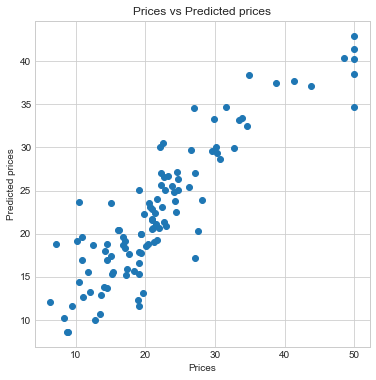

In [73]:
#ploting 
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
plt.scatter(Y_test,Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.grid(True)
plt.show()

### USING SCHOTASTIC GRADIENT DESCENT :

In [74]:
import tqdm
from sklearn.linear_model import SGDRegressor
train_rmse = []
cv_rmse = []
alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]

In [75]:
for i in alphas:
    sgd = SGDRegressor(loss='squared_loss',penalty='l1',alpha=i)
    sgd.fit(X_tr, Y_train)
    Y_predtrain = sgd.predict(X_tr)
    Y_predcv = sgd.predict(X_cv)
    rmsetrain = np.sqrt(mean_squared_error(Y_train, Y_predtrain))
    train_rmse.append(rmsetrain)
    rmsecv = np.sqrt(mean_squared_error(Y_cv, Y_predcv))
    cv_rmse.append(rmsecv)

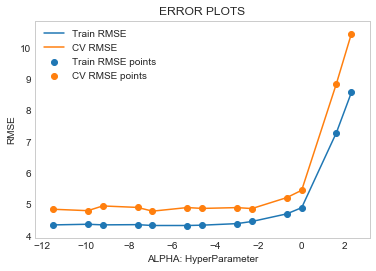

In [76]:
import numpy
plt.plot(numpy.log(alphas), train_rmse, label='Train RMSE')
plt.plot(numpy.log(alphas), cv_rmse, label='CV RMSE')

plt.scatter(numpy.log(alphas), train_rmse, label='Train RMSE points')
plt.scatter(numpy.log(alphas), cv_rmse, label='CV RMSE points')

plt.legend()
plt.xlabel("ALPHA: HyperParameter")
plt.ylabel("RMSE")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [77]:
sgd = SGDRegressor(loss='squared_loss',penalty='l1',alpha=0.0001)
sgd.fit(X_tr, Y_train)
Y_pred= sgd.predict(X_te)
sgd_coeff=sgd.coef_

In [78]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Weights"]
for i in sgd_coeff:
    x.add_row([round(i,2)])
print(x)

+---------+
| Weights |
+---------+
|   0.4   |
|   0.3   |
|   -0.6  |
|  -0.62  |
|   2.41  |
|  -0.03  |
|  -2.04  |
|   0.57  |
|  -0.62  |
|  -1.58  |
|   1.12  |
|  -4.12  |
+---------+


In [79]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
R_squared= sgd.score(X_te,Y_test)
print("Mean squared error : ",mse)
print("Root Mean Squared Error: ",rmse)
print("Coefficient of Determination: ",R_squared)

Mean squared error :  23.176867753650995
Root Mean Squared Error:  4.814235947027419
Coefficient of Determination:  0.7612882529610562


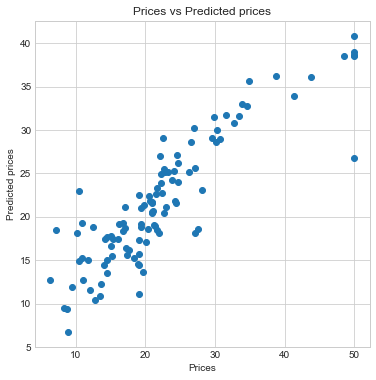

In [80]:
#ploting 
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
plt.scatter(Y_test,Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.grid(True)
plt.show()

### MANUAL SGD :

In [81]:
W,B,iteration,lr_rate,k=np.zeros(shape=(1,12)),0,750,0.01,299 #intialise W and B to zero
while iteration>=0:
    w,b,temp_vectors,temp_intercept=W,B,np.zeros(shape=(1,12)),0 
    x=np.array(X_tr)
    y=np.array(Y_train)
    for i in range(k):
        temp_vectors+=(-2)*x[i]*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)
        temp_intercept+=(-2)*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)
    W=(w-lr_rate*(temp_vectors)/k)
    B=(b-lr_rate*(temp_intercept)/k)
    iteration-=1
    
print(W)
print(B)

[[ 1.01749806  0.41132651 -0.27180488 -2.11330295  1.59508463  0.48735389
  -3.0880859   1.22786145 -1.55280306 -1.65623543  0.98137146 -5.5160784 ]]
[22.26220163]


In [82]:
W.shape

(1, 12)

In [83]:
X_te.T.shape

(12, 107)

In [84]:
#prediction on x_test
#https://www.geeksforgeeks.org/numpy-asscalar-in-python/
y_predic_lr=[]
for i in range(len(X_te)):
    val=(np.dot(W,X_te[i].T))+B  #val= wTx+b
    y_predic_lr.append(np.asscalar(val))

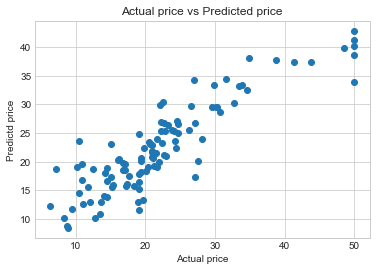

In [85]:
#Scatter plot of actual price vs predicted price

plt.scatter(Y_test,y_predic_lr)
plt.xlabel('Actual price')
plt.ylabel('Predictd price')
plt.title('Actual price vs Predicted price')
plt.show()


In [86]:
MSE_lr=mean_squared_error(Y_test,y_predic_lr)
print('mean squared error =',MSE_lr)

mean squared error = 21.369335685761953


In [87]:
from prettytable import PrettyTable    
x = PrettyTable()
W=np.ravel(W)
x.field_names=['Weight vector manual']
W

array([ 1.01749806,  0.41132651, -0.27180488, -2.11330295,  1.59508463,
        0.48735389, -3.0880859 ,  1.22786145, -1.55280306, -1.65623543,
        0.98137146, -5.5160784 ])

In [88]:
for i in range(len(W)):
    x.add_row([W[i]])
print(x)

+----------------------+
| Weight vector manual |
+----------------------+
|  1.0174980637590862  |
| 0.41132650855750125  |
| -0.2718048821473227  |
|  -2.113302946192935  |
|  1.595084634910593   |
|  0.4873538891187208  |
| -3.0880858981816974  |
|  1.2278614528949607  |
| -1.5528030594175883  |
| -1.6562354295573578  |
|  0.9813714589503894  |
|  -5.516078397158724  |
+----------------------+


### CONCLUSION :

In [89]:
from prettytable import PrettyTable
#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable
x=PrettyTable()
x.field_names=["Model","Metric","Value"]
x.add_row(["Linear Regression","MSE",21.410761337697338])
x.add_row(["Linear Regression","RMSE",4.627176389300211])
x.add_row(["SGD Regression(SKLEARN)","MSE",22.580122026939538])
x.add_row(["SGD Regression(SKLEARN)","RMSE",4.751854588151824])
x.add_row(["SGD Regression(MANUAL)","MSE",21.369335685761953])
print(x)

+-------------------------+--------+--------------------+
|          Model          | Metric |       Value        |
+-------------------------+--------+--------------------+
|    Linear Regression    |  MSE   | 21.410761337697338 |
|    Linear Regression    |  RMSE  | 4.627176389300211  |
| SGD Regression(SKLEARN) |  MSE   | 22.580122026939538 |
| SGD Regression(SKLEARN) |  RMSE  | 4.751854588151824  |
|  SGD Regression(MANUAL) |  MSE   | 21.369335685761953 |
+-------------------------+--------+--------------------+
